In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv('../input/wine-data/wine_data.csv',usecols=[0,1,2],header=None)
df.columns=['Class Label', 'Alcohol','Malic Acid']


In [3]:
df.sample(5)

,Class Label,Alcohol,Malic Acid
2,1,13.16,2.36
155,3,13.17,5.19
45,1,14.21,4.04
60,2,12.33,1.10
127,2,11.79,2.13


<AxesSubplot:xlabel='Alcohol', ylabel='Density'>

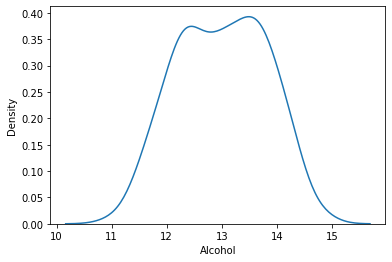

In [4]:
sns.kdeplot(df['Alcohol'])

<AxesSubplot:xlabel='Malic Acid', ylabel='Density'>

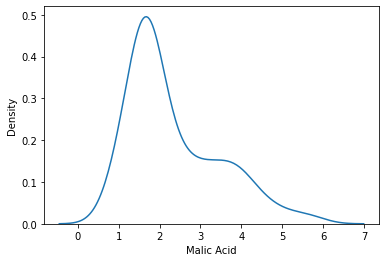

In [5]:
sns.kdeplot(df['Malic Acid'])

/opt/conda/lib/python3.7/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


<AxesSubplot:xlabel='Alcohol', ylabel='Malic Acid'>

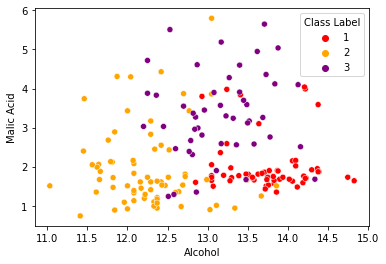

In [6]:
color_dictionary={1:'red',2:'orange',3:'purple'}
sns.scatterplot(df['Alcohol'],df['Malic Acid'],hue=df['Class Label'],palette=color_dictionary)

In [7]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test =train_test_split(df.drop('Class Label',axis=1),df['Class Label'],random_state=0,test_size=0.3)

In [8]:
X_train.shape, y_train.shape

((124, 2), (124,))

In [9]:
from sklearn.preprocessing import MinMaxScaler
scaler =MinMaxScaler()
#fit the scaler to the train set, it will learn the parameters
scaler.fit(X_train)

MinMaxScaler()

In [10]:
X_train_scaled =scaler.transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [11]:
X_train_scaled =pd.DataFrame(X_train_scaled,columns=X_train.columns)
X_train_scaled.head()

,Alcohol,Malic Acid
0,0.720430,0.203782
1,0.319892,0.084034
2,0.602151,0.712185
3,0.572581,0.563025
4,0.760753,0.130252


In [12]:
X_train_scaled.describe()

,Alcohol,Malic Acid
count,124.000000,124.000000
mean,0.525017,0.313805
std,0.215414,0.238802
min,0.000000,0.000000
25%,0.358199,0.150735
50%,0.540323,0.209034
75%,0.701613,0.495273
max,1.000000,1.000000


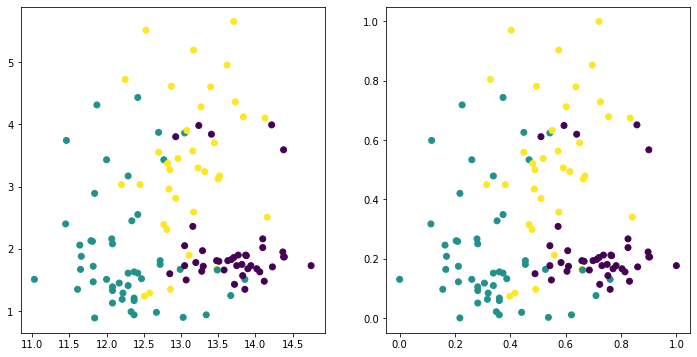

In [13]:
fig,(ax1,ax2)=plt.subplots(ncols=2, figsize=(12,6))
ax1.scatter(X_train['Alcohol'],X_train['Malic Acid'],c=y_train)
ax1.set_title=('Before Scaling')
ax2.scatter(X_train_scaled['Alcohol'],X_train_scaled['Malic Acid'],c=y_train)
ax2.set_title ='After Scaling'